In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [40]:
pd.set_option('display.max_colwidth', -1)

In [2]:
df = pd.read_pickle('../Pickled_from_mongo/combined_eg_gulf.p')

In [3]:
df.shape

(940, 5)

In [4]:
df = df.drop(['_id', ], axis=1)


In [5]:
df = df.set_index(['cleaned_name'])

In [6]:
df.sample(8)

,cleaned_geo,cleaned_text,class
cleaned_name,,,
Midotarek_7,Egypt,قعده فوق السطوح ساعة العصاري مع كوباية شاي ع ا...,EG
A6aif,آلَكــوٌيــتـ,حطيلهم لافتات علي الشبات الشوارع خوفج يضيعون ا...,GULF
hossam_darweesh,None,قللي الكمية تدريجيا...بدل ازازة في اليوم مثلا ...,EG
shbr11,Saudi Arabia,عندي استقسار هلحين فيه اسرة كبيره يقالها ( الت...,GULF
A_bafgeeer,None,أعادة ضبط المصنع مع القليل من البهارات الزيدية...,GULF
safa2001gam,مَـ ع ـــآاک دايمــٰــآاا,: بتفتحوا مواضيع ازاي بتعملوها ازاي ياكفرة,EG
Moood,None,إنها مغسلة سيارات يا سوس,GULF
hairan555,Saudi Arabia,: مغسلة ملاااااااابس،،،متنقلة :,GULF


### Label Encode the Categories


In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le = LabelEncoder()
df['class_numerical'] = le.fit_transform(df['class'])

In [9]:
df.shape

(940, 4)

In [10]:
df.sample(8)

,cleaned_geo,cleaned_text,class,class_numerical
cleaned_name,,,,
syrianinturkey,None,من رسائلكم مطلوب محل للايجار يصلح ل مغسلة سيار...,GULF,1
awad53,None,اهلين شمس ازيك,EG,0
k566_x,Kh.,زهقت من الطريج كليوم رايح راد من ام الهيمان لي...,GULF,1
fatma980malika,None,تمام ازيك انتى,EG,0
Sa95d,سلطنة عمان العظيمة⁦🇴🇲⁩,البريمي هذي ونحن ف الطريج الى الامارات,GULF,1
rafad999Aw,Saudi Arabia,•ضمان سنتين شطاف كاديا شطاف داليا •ضمان سنوات ...,GULF,1
VagueA_,فى اللانهائية وما بعدها,ازيك يا سماسم يا قمر. صباح الاناناس على اغلى ا...,EG,0
MenNa_S_Radwan,Egypt,*رايحه ازور عمتى* ازيك ياعمتو اخبارك وحشانى با...,EG,0


In [11]:
df.class_numerical.unique()


array([0, 1])

### Prepare Document Term Matrix


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [13]:
tfidf_vectorizer = TfidfVectorizer(min_df = 1)


### TFIDF

In [14]:
document_term_matrix_sps = tfidf_vectorizer.fit_transform(df.cleaned_text)

In [15]:
document_term_matrix_sps


<940x4297 sparse matrix of type '<class 'numpy.float64'>'
	with 9954 stored elements in Compressed Sparse Row format>

In [16]:
document_term_matrix_df = pd.DataFrame(document_term_matrix_sps.toarray(),
                                       index=df.index,
                                       columns=tfidf_vectorizer.get_feature_names())

In [17]:
pd.concat([df.cleaned_text, document_term_matrix_df], axis=1).sample(10)

,cleaned_text,___,_ثواني,_ضمان١٠سنوات,about,al,and,aziz,cousin,day,...,يومك,يومها,يومين,يونس,يوووه,يويو,٣٠,چلوتي,چنا,ﻻحياة
cleaned_name,,,,,,,,,,,,,,,,,,,,,
alqemmapark,تشمل / بيت الشعر - جلسة خارجية - قسم المندي وا...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ask_Almadina,مـﻧـــ الخاصــــ عندي سجادة إيراني فين أحسن مغ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MeroToman,*همسك في خناقه,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hassanjasim,توخو زحمة الطريج باجر,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MUAD__8,العوالي شارع ابراهيم الجفالي قبل اول اشاره بال...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
gghhdhj58752,اهلا ي ولد,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dalia_PT,و ده يتقال عليه كلب أزاي بس ️,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
_al8,ماتركب ذودك مع ازيك,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ask_Jeddah1,مـﻧـــ الخاصــــ ابغى مغسلة تغسل بستم بخار؟,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Compute SVD of Document Term Matrix

In [18]:
from sklearn.decomposition import TruncatedSVD

In [19]:
n_components = 2
SVD = TruncatedSVD(n_components)
component_names = ["component_"+str(i+1) for i in range(n_components)]

In [20]:
svd_matrix = SVD.fit_transform(document_term_matrix_df)


In [21]:
SVD.explained_variance_ratio_


array([ 0.01409815,  0.01253027])

In [22]:
svd_matrix[:4]


array([[ 0.01112079,  0.00574728],
       [ 0.02365777,  0.00937089],
       [ 0.00966818,  0.00554666],
       [ 0.01857916,  0.00725707]])

### Load SVD Matrix with Documents and Labels


In [23]:
latent_semantic_analysis = pd.DataFrame(svd_matrix,
                                        index=document_term_matrix_df.index,
                                        columns=component_names)
latent_semantic_analysis['cleaned_text'] = df.cleaned_text
latent_semantic_analysis['class'] = df['class']

In [24]:
df.cleaned_text

cleaned_name
kamal              أزاي أقول لك كنا زمان ... والماضي كان فى الغيب...
agabdelrehim       هي آراء آه بس أزاي أجويرو منتهي يعني أمال لو م...
ElsndubadE         أنت صيني أزاي تقارن شادي بالخطيب ألي هو الوحيد...
h_sawires          أزاي الناس كانت بتغرد في الخمسينات قبل إختراع ...
Hagerelmor         التوينز اللي معاها كل الحلو والوحش والمصايب وا...
YaraHossamElDin    : عن الناس إلي ربنا بعتهالك عشان يقولك شوف آخر...
weaamaboelwafa1                   شوفت لما تجاهلت الناس وشك نور أزاي
hjjarr             ده انا صاحيه من ساعه وزهقت هكمل أزاي بقيت اليو...
amira_ashraf97     أزاي اتعرفت علي افضل صديق/ة عندك/ي؟ — افضل صدي...
YasmeenShabana2    اكيد مكنتيش هتقدري تعيشي ي بنتي ، انتي م غيري ...
trbdKnADYIRSP7                                 الله اكبر رووووووووعه
i_asam             أول مرة أسمع أغنية رق الحـبيب لأم كلثـوم كـامل...
rehamaboelhamed    : أول مرة أسمع أغنية رق الحـبيب لأم كلثـوم كـا...
mahmoud_s58                      أزاي يعني واحد يكون مجرم ويطلع براة
Mn3m_reda          ال

In [25]:
latent_semantic_analysis.sample(4)


,component_1,component_2,cleaned_text,class
cleaned_name,,,,
M7mdd_3del,0.008894,0.006308,صحيت اتعشيت و شربت سجارة و كوباية الشاي، ارجع ...,EG
DyyGhadeer,0.035869,0.017849,انا من زمان مغسلة يدي من الزواج ودحين اقتنعت اكتر,GULF
ALQRYNIAH,0.005575,0.005113,مغسلة قباء بكوادر سعوديه بحي القرينيه يستحقون ...,GULF
al3nzeya94,0.024529,0.005044,+2 آمين أجمعين يارب _ بالنسبه لي عادي جدا و ان...,GULF


In [26]:
vocabulary_loadings = pd.DataFrame(SVD.components_,
                                   index=component_names,
                                   columns=tfidf_vectorizer.get_feature_names()).T

In [27]:
vocabulary_loadings['abs_component_1'] = np.abs(vocabulary_loadings.component_1)
vocabulary_loadings['abs_component_2'] = np.abs(vocabulary_loadings.component_2)

### Display Top Terms for Each Component

Top 10 Terms for Component 1

In [28]:
vocabulary_loadings.sort_values('abs_component_1',ascending=False).head(10)


,component_1,component_2,abs_component_1,abs_component_2
ازيك,0.851847,-0.020285,0.851847,0.020285
يا,0.361012,-0.004983,0.361012,0.004983
rice,0.073529,-0.001930,0.073529,0.001930
ايه,0.073097,0.001917,0.073097,0.001917
انا,0.071557,0.007785,0.071557,0.007785
على,0.070687,0.008282,0.070687,0.008282
رز,0.064988,-0.001566,0.064988,0.001566
مديرهم,0.062326,-0.001672,0.062326,0.001672
شوية,0.062174,-0.001233,0.062174,0.001233
مش,0.057461,0.003491,0.057461,0.003491


Top 10 Terms for Component 2


In [29]:
vocabulary_loadings.sort_values('abs_component_2',ascending=False).head(10)


,component_1,component_2,abs_component_1,abs_component_2
شطاف,0.002478,0.423323,0.002478,0.423323
ضمان,0.002276,0.376135,0.002276,0.376135
شاور,0.002172,0.365919,0.002172,0.365919
مع,0.013617,0.320337,0.013617,0.320337
مسطرة,0.001871,0.317127,0.001871,0.317127
صاعد,0.001674,0.284424,0.001674,0.284424
كاديا,0.001239,0.211661,0.001239,0.211661
داليا,0.001239,0.211661,0.001239,0.211661
سنتين,0.001239,0.211661,0.001239,0.211661
سنوات,0.002171,0.210493,0.002171,0.210493


### Plot Top Two Components


(-0.5, 1)

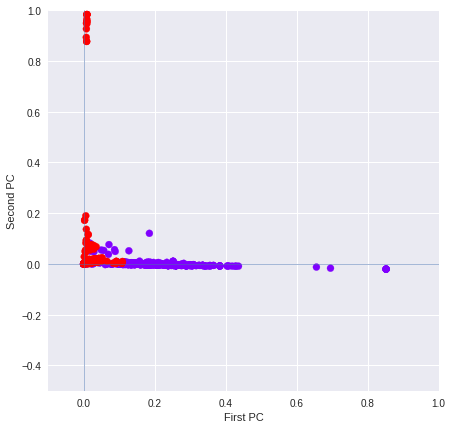

In [30]:
plt.figure(figsize=(7,7))
pc_1 = latent_semantic_analysis['component_1'].values
pc_2 = latent_semantic_analysis['component_2'].values

plt.scatter(pc_1, pc_2, c=df['class_numerical'], cmap='rainbow')

plt.xlabel('First PC')
plt.ylabel('Second PC')
plt.axvline(linewidth=0.5)
plt.axhline(linewidth=0.5)
plt.xlim(-.1,1)
plt.ylim(-.5,1)

(-0.1, 1)

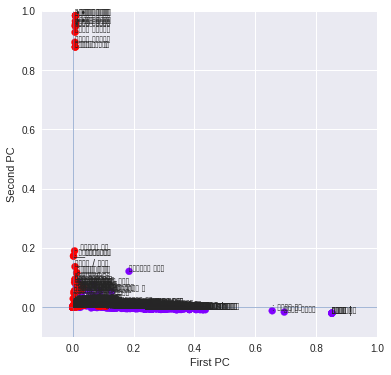

In [31]:
plt.figure(figsize=(6,6))
pc_1 = latent_semantic_analysis['component_1'].values
pc_2 = latent_semantic_analysis['component_2'].values

strings = df['cleaned_text'].values
for i, (x, y) in enumerate(zip(pc_1, pc_2)): 
    plt.text(x,y,strings[i][:10])

plt.scatter(pc_1, pc_2, c=df['class_numerical'], cmap='rainbow')

plt.xlabel('First PC')
plt.ylabel('Second PC')
plt.axvline(linewidth=0.5)
plt.axhline(linewidth=0.5)
plt.xlim(-.1,1)
plt.ylim(-.1,1)

(-0.3, 0.6)

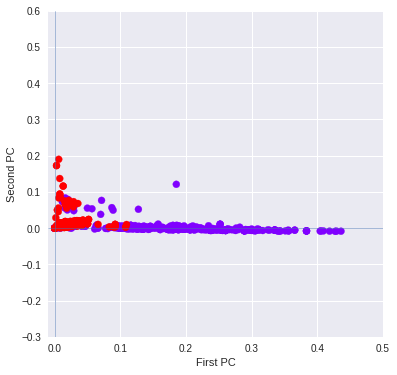

In [32]:
plt.figure(figsize=(6,6))
pc_1 = latent_semantic_analysis['component_1'].values
pc_2 = latent_semantic_analysis['component_2'].values

plt.scatter(pc_1, pc_2, c=df['class_numerical'], cmap='rainbow')

plt.xlabel('First PC')
plt.ylabel('Second PC')
plt.axvline(linewidth=0.5)
plt.axhline(linewidth=0.5)
plt.xlim(-.01,.5)
plt.ylim(-.3,.6)

In [35]:
eg_mask = latent_semantic_analysis['class'] == 'EG'


In [41]:
latent_semantic_analysis[eg_mask]

,component_1,component_2,cleaned_text,class
cleaned_name,,,,
kamal,0.011121,0.005747,أزاي أقول لك كنا زمان ... والماضي كان فى الغيب بكره واللي أحنا فيه دلوقت كمان ... ح يفوت علينا ولا ندري,EG
agabdelrehim,0.023658,0.009371,هي آراء آه بس أزاي أجويرو منتهي يعني أمال لو مكنش الهداف التاريخي للسيتي و كل موسم اقل عدد من الاهداف…,EG
ElsndubadE,0.009668,0.005547,أنت صيني أزاي تقارن شادي بالخطيب ألي هو الوحيد ألي خد الكورة الذهبية من مصر وبشهادت الزملكاوي قبل الأ…,EG
h_sawires,0.018579,0.007257,أزاي الناس كانت بتغرد في الخمسينات قبل إختراع تويتر.,EG
Hagerelmor,0.028842,0.007488,التوينز اللي معاها كل الحلو والوحش والمصايب والاكل والفشل مش عارفه من غيرك كنت هعيش أزاي ربنا يخليكي ليا ومش تويته توصفك,EG
YaraHossamElDin,0.017093,0.004815,: عن الناس إلي ربنا بعتهالك عشان يقولك شوف آخر صبرك طلع حلو أزاي,EG
weaamaboelwafa1,0.015251,0.004204,شوفت لما تجاهلت الناس وشك نور أزاي,EG
hjjarr,0.037836,0.015486,ده انا صاحيه من ساعه وزهقت هكمل أزاي بقيت اليوم من غير ما أنتحر,EG
amira_ashraf97,0.029632,0.060092,أزاي اتعرفت علي افضل صديق/ة عندك/ي؟ — افضل صديقة عندي مع بعض من اولى ابتدائي مش فاكرة اتعرفنا ازاي,EG


In [37]:
gulf_mask = latent_semantic_analysis['class'] == 'GULF'

In [42]:
latent_semantic_analysis[gulf_mask]

,component_1,component_2,cleaned_text,class
cleaned_name,,,,
typicallynorah,3.018048e-02,8.715180e-03,: على الاقل ارحم من ان تتعود على وجود احد ويغرقك اهتمام وحب ويغنيك عن الدنيا وبنص الطريج يخليك تعاني وتت…,GULF
Hasan95780025,1.887279e-02,7.363799e-03,وحدة مكافحة الموز في الطريج,GULF
FathiyaAjlan1,5.033147e-02,1.188851e-02,انا صوت الفريج وبنتٍ تناديك تدليك الفرح وينه انا ثوبك وسبحةٍ في يدك واللي راح من عمرك انا اشيله أدليك الطريج اللي…,GULF
hodaaa_q8,7.616137e-03,4.679098e-03,اوك مسافة الطريج يايتلچ ‍️‍️‍️,GULF
DzY9d,1.218589e-02,4.974852e-03,كلام جميل لكن وين التطبيق.طلع قانون للخدم ونشر بالجريدة الرسمية من زمان وللحين احنا ناطرين ا…,GULF
ZuSX6cXU62tZPUW,2.484645e-02,6.400044e-03,الثالث علي الطريج طولي بالج اول الله️,GULF
R__Aey,1.053834e-02,4.770831e-03,لما أكون مستعيله ويغلط السواق ف الطريج,GULF
almutairi43__,1.400235e-02,3.479418e-03,احبك كثر ماتوقف على جنب الطريج اشجار احبك كثر مايقسى الشتا وتهاجر طيوره..,GULF
skullxcrusherx,8.498699e-03,4.189959e-03,"لحد يسلمي الAUX ويقولي بسج توقفين بنص الاغنيه, الطريج دقايق وانا عندي اغنيه بسمعها!",GULF


In [56]:
latent_semantic_analysis[(latent_semantic_analysis['class'] == 'EG') 
                         & (latent_semantic_analysis.component_2 > .050)]

,component_1,component_2,cleaned_text,class
cleaned_name,,,,
amira_ashraf97,0.029632,0.060092,أزاي اتعرفت علي افضل صديق/ة عندك/ي؟ — افضل صديقة عندي مع بعض من اولى ابتدائي مش فاكرة اتعرفنا ازاي,EG
evilangel2264,0.027495,0.056982,: أنا مريض بمرض التفكير والتفاصييل.. لو أتكلمت مع حد كلمتين بس ، بحلل شخصيته ، وبحلل طريقه الكلام اللي قالهالي وادقق…,EG
Badr_esraa,0.127603,0.051928,أنا عندى مشكله ف الكلام مع الناس شات والله..لو حد قالى ازيك بقول تمام..الحمد لله..كويسة.. لكن انى ارد اقول وانت ازي…,EG
chebih,0.087113,0.056542,عائلات معتقلي اكديم ازيك يضربون عن الطعام تضامنا مع أبنائهم بسجون الاحتلال المغربية,EG
_al8,0.185334,0.120802,ماتركب ذودك مع ازيك,EG
b_madridista7,0.020387,0.079128,السيجارة مع كوباية القهوة بتاعة الوقت دا غير أي حاجة ف اليوم كله,EG
AlaaAbd64600964,0.018651,0.074967,كوباية شااااي مع هاااند فري ومشغل فيه اغاني محمد عبدالرحمن,EG
iabdoz,0.011698,0.072718,كوباية سحلب بالمكسرات مع حجر معسل هي حل لكل المشاكل دلوقتي,EG
ahmeboshra53,0.015181,0.055587,: من يومين كنت قاعد مع بدو وماكنتش اعرف حوار إن كوباية الشاي لازم تتقلب عشان يبطّلوا يزوّدوها، الكوباية صغيرة جدًا وا…,EG


In [57]:
latent_semantic_analysis[(latent_semantic_analysis['class'] == 'GULF') 
                         & (latent_semantic_analysis.component_2 > .50)]

,component_1,component_2,cleaned_text,class
cleaned_name,,,,
ExJ8s,0.008621,0.877168,: سنتين: شطاف كاديا _ شطاف داليا سنوات: شاور مع مسطرة(صاعد نازل) كروم _ شاور مع مسطرة(صاعد نازل) ذهبي…,GULF
shataaaaat,0.008621,0.877168,سنتين: شطاف كاديا _ شطاف داليا سنوات: شاور مع مسطرة(صاعد نازل) كروم _ شاور مع مسطرة(صاعد نازل) ذهبي…,GULF
Shhhh501,0.009526,0.983356,: •ضمان سنتين /شطاف كاديا /شطاف داليا •ضمان سنوات /شاور مع مسطرة(صاعد نازل) كروم /شاور مع مسطرة(…,GULF
JDI_12,0.009472,0.956519,: •ضمان سنتين /شطاف كاديا /شطاف داليا •ضمان سنوات /شاور مع مسطرة(صاعد نازل) كروم /شاور مع مسطر…,GULF
doaa_m111,0.009526,0.983356,•ضمان سنتين /شطاف كاديا /شطاف داليا •ضمان سنوات /شاور مع مسطرة(صاعد نازل) كروم /شاور مع مسطرة(…,GULF
rafad999Aw,0.009401,0.947399,•ضمان سنتين شطاف كاديا شطاف داليا •ضمان سنوات شاور مع مسطرةصاعد نازل كروم شاور مع مسطرة(صاعد ن…,GULF
Ds8mD,0.009472,0.956519,•ضمان سنتين /شطاف كاديا /شطاف داليا •ضمان سنوات /شاور مع مسطرة(صاعد نازل) كروم /شاور مع مسطر…,GULF
nissoo58,0.007966,0.926896,ضمان سنتين شطاف كاديا شطاف داليا ضمان سنوات شاور مع مسطرة(صاعد…,GULF
B11Do,0.009321,0.983140,ضمان سنتين شطاف كاديا شطاف داليا ضمان سنوات شاور مع مسطرة(صاعد نازل) كروم شاور مع مسطرة(صاعد…,GULF


### LSA_Topic Modeling

In [48]:
n_components = 50
SVD = TruncatedSVD(n_components)
component_names = ["component_"+str(i+1) for i in range(n_components)]

In [49]:
svd_matrix = SVD.fit_transform(document_term_matrix_df)

In [50]:
sum(SVD.explained_variance_ratio_)

0.2233497245712793

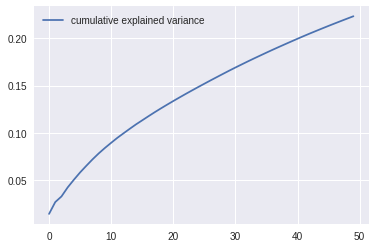

In [51]:
plt.plot(range(50), np.cumsum(SVD.explained_variance_ratio_), label='cumulative explained variance')
plt.legend()

#### Display Top Terms for Each Component 'topics'


In [53]:
vocabulary_expression = pd.DataFrame(SVD.components_,
                                     index=component_names,
                                     columns=tfidf_vectorizer.get_feature_names()).T


In [54]:

for i in range(1,11):
    vocabulary_expression['abs_component_{}'.format(i)] = np.abs(vocabulary_expression['component_{}'.format(i)])

In [55]:
vocabulary_expression['abs_component_1'].sort_values(ascending=False).head(7)


ازيك    0.851840
يا      0.361024
rice    0.073527
ايه     0.073097
انا     0.071493
على     0.070692
رز      0.064987
Name: abs_component_1, dtype: float64

In [58]:
vocabulary_expression['abs_component_2'].sort_values(ascending=False).head(7)

شطاف     0.423315
ضمان     0.376114
شاور     0.365912
مع       0.320395
مسطرة    0.317121
صاعد     0.284419
سنتين    0.211657
Name: abs_component_2, dtype: float64

In [59]:
vocabulary_expression['abs_component_3'].sort_values(ascending=False).head(7)

الطريج    0.394968
من        0.347232
مغسلة     0.308209
في        0.258104
كوباية    0.213832
ازيك      0.202962
انا       0.160500
Name: abs_component_3, dtype: float64

In [60]:
vocabulary_expression['abs_component_4'].sort_values(ascending=False).head(7)

يا        0.395070
rice      0.303621
رز        0.282954
ازيك      0.271132
مديرهم    0.268323
يسلمو     0.263744
حبو       0.263744
Name: abs_component_4, dtype: float64

In [61]:
vocabulary_expression['abs_component_5'].sort_values(ascending=False).head(7)

الطريج    0.677917
مغسلة     0.378569
عامل      0.198216
من        0.165718
مسافة     0.136916
سيارات    0.134355
السلام    0.103863
Name: abs_component_5, dtype: float64

In [62]:
vocabulary_expression['abs_component_6'].sort_values(ascending=False).head(7)

كوباية    0.331696
لو        0.288118
الطريج    0.275147
انا       0.267383
قالي      0.251624
حد        0.249025
عامل      0.243225
Name: abs_component_6, dtype: float64

In [63]:
vocabulary_expression['abs_component_7'].sort_values(ascending=False).head(7)

كوباية    0.448325
يا        0.302809
قالي      0.202941
الطريج    0.202035
عامل      0.191988
حد        0.189955
لو        0.175360
Name: abs_component_7, dtype: float64

In [64]:
vocabulary_expression['abs_component_8'].sort_values(ascending=False).head(7)

عامل    0.662473
من      0.214275
قالي    0.187907
حد      0.176668
لو      0.175379
انا     0.160504
يا      0.158941
Name: abs_component_8, dtype: float64

In [66]:
vocabulary_expression['abs_component_9'].sort_values(ascending=False).head(7)

يا        0.601964
عامل      0.342727
ازيك      0.197014
كوباية    0.160026
في        0.134651
حبو       0.125766
يسلمو     0.125766
Name: abs_component_9, dtype: float64

In [65]:
vocabulary_expression['abs_component_10'].sort_values(ascending=False).head(7)

جامعة       0.501238
هي          0.385722
شهادة       0.189409
للشهادات    0.189409
أكبر        0.189409
الآن        0.189409
سعود        0.189409
Name: abs_component_10, dtype: float64

### Search

#### Encode the search term using the same vectorizer


In [68]:
search_sentences = [
{"sentence": "الثوره المصريه تحولت من ثورة شارع محدش يزعل", "title" : "EG"},
{"sentence": "نفسي اكون زيك بعرف اطنشك أو اخليك اخر حاجة و بعد كده اضحك عليك بكلمتين و انت تصدق كل مرة عادي", "title" : "EG"},
{"sentence": "بما أن أغلب اللي متابعني مش بقدر اوصلهم أغلب الوقت. . ف كل يوم هعمل تويته آخر اليوم اللي هيعمل لايك", "title" : "EG"},
{"sentence": "مقاومتنا للأشياء طلعت بتقل مع الزمن، مبقيناش نناهد ف حاجة.. و مش عشان أحنا جامدين قوي. هو حيلنا بس", "title" : "EG"},
{"sentence": "عارف ايه احلى حاجة حاصلة ليا انى منك وانت برضه بتجرى فيا انت اخر كل يوم باخدك ف حضنى وانت اول", "title" : "EG"},
{"sentence": "القاضى اللى حكم على المعتقلين بالاعدام هو هو نفس القاضى اللى هيراقب الانتخابات", "title" : "EG"},
{"sentence": "وفجأة تيجي سيرة حاجة في وسط الكلام تقلب عليك القديم والجديد وترسم في دماغك علامات استفهام مالهاش", "title" : "EG"},
{"sentence": "السنة اللي فاتت الاعلام الانجليزي قال المفروض بيب يعرف انه في البريمييرليج لازم يتأقلم و يلعب كورتنا", "title" : "EG"},
{"sentence": "حرب و قتال و ناس تموت و هذا الدلخ يقول سعيد و مثل أجواء كرة القدم ", "title" : "GULF"},
{"sentence": "من غباء الهلالي الدلخ اللي يفتخر بفوز فريقه من قيادة رئيس الحكام كلاتنبيرغ له سنه ماسنع الحكام السعوديين", "title" : "GULF"},
{"sentence": "شفتوا هوشة شيعان وغالي لو هي بين الهلاليين كان شفتوا هاشتاق كبر راسهم المنسم وكان جاك هذا الدلخ ", "title" : "GULF"},
{"sentence": "ذويه ارفضوا لانه عيار جمبازي مافيه شي وبليس مايكسر اماعينه يامال لضعفه قطو بو سبعة ارواح ", "title" : "GULF"},
{"sentence": "صج ياجماعه في سوال محيرني ليش المتان مافيهم النفسيه عكس الضعاف تقول خاشوقه ومنفس", "title" : "GULF"},
{"sentence": "لم نعاند التاريخ مسيو خاشوقه بل الواقع والعقلانية ابعدنا من التدمير والانفلات", "title" : "GULF"},
{"sentence": "أي والله وعندي عنه ابو خاشوقة أسرار لا تشرف قد أقولها اذا لم يلجم لسانه عن سب وطني", "title" : "GULF"},
{"sentence": "قبل ماتتكلمين يالطيبه افهمي السالفه ومنب ملزومه بسنابي اني اشرح كل شيء صارت بالتفصيل بس لانك قلق خل", "title" : "GULF"},
]

In [69]:
search_sentences_df = pd.DataFrame(search_sentences)


In [72]:
search_sentences_df.sample(4)

,sentence,title
1,نفسي اكون زيك بعرف اطنشك أو اخليك اخر حاجة و بعد كده اضحك عليك بكلمتين و انت تصدق كل مرة عادي,EG
8,حرب و قتال و ناس تموت و هذا الدلخ يقول سعيد و مثل أجواء كرة القدم,GULF
3,مقاومتنا للأشياء طلعت بتقل مع الزمن، مبقيناش نناهد ف حاجة.. و مش عشان أحنا جامدين قوي. هو حيلنا بس,EG
14,أي والله وعندي عنه ابو خاشوقة أسرار لا تشرف قد أقولها اذا لم يلجم لسانه عن سب وطني,GULF


In [73]:
search_sentences_df.sentence


0     الثوره المصريه تحولت من ثورة شارع محدش يزعل                                                             
1     نفسي اكون زيك بعرف اطنشك أو اخليك اخر حاجة و بعد كده اضحك عليك بكلمتين و انت تصدق كل مرة عادي           
2     بما أن أغلب اللي متابعني مش بقدر اوصلهم أغلب الوقت. . ف كل يوم هعمل تويته آخر اليوم اللي هيعمل لايك     
3     مقاومتنا للأشياء طلعت بتقل مع الزمن، مبقيناش نناهد ف حاجة.. و مش عشان أحنا جامدين قوي. هو حيلنا بس      
4     عارف ايه احلى حاجة حاصلة ليا انى منك وانت برضه بتجرى فيا انت اخر كل يوم باخدك ف حضنى وانت اول           
5     القاضى اللى حكم على المعتقلين بالاعدام هو هو نفس القاضى اللى هيراقب الانتخابات                          
6     وفجأة تيجي سيرة حاجة في وسط الكلام تقلب عليك القديم والجديد وترسم في دماغك علامات استفهام مالهاش        
7     السنة اللي فاتت الاعلام الانجليزي قال المفروض بيب يعرف انه في البريمييرليج لازم يتأقلم و يلعب كورتنا    
8     حرب و قتال و ناس تموت و هذا الدلخ يقول سعيد و مثل أجواء كرة القدم                                       
9

In [74]:
search_terms_encoded = tfidf_vectorizer.transform(search_sentences_df.sentence)

In [76]:
search_terms_encoded_df = pd.DataFrame(search_terms_encoded.toarray(), 
                                       index=search_sentences_df.sentence, 
                                       columns=tfidf_vectorizer.get_feature_names())

### Select a Random Search Term

In [77]:
random_search_term_df = search_terms_encoded_df.sample()
random_search_term_df.head()

,___,_ثواني,_ضمان١٠سنوات,about,al,and,aziz,cousin,day,depressed,...,يومك,يومها,يومين,يونس,يوووه,يويو,٣٠,چلوتي,چنا,ﻻحياة
sentence,,,,,,,,,,,,,,,,,,,,,
أي والله وعندي عنه ابو خاشوقة أسرار لا تشرف قد أقولها اذا لم يلجم لسانه عن سب وطني,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Append the search term to the document term matrix


In [78]:
dtm_with_search_term = document_term_matrix_df.append(random_search_term_df)


In [79]:

svd_matrix = SVD.fit_transform(dtm_with_search_term)

In [80]:
svd_df = pd.DataFrame(svd_matrix, 
                      index=dtm_with_search_term.index, 
                      columns=component_names)

### Identify the Vector for our Search Term

In [85]:
search_term_svd_vector = svd_df.loc[random_search_term_df.index]
search_term_svd_vector

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,...,component_42,component_43,component_44,component_45,component_46,component_47,component_48,component_49,component_50,cosine_sim
أي والله وعندي عنه ابو خاشوقة أسرار لا تشرف قد أقولها اذا لم يلجم لسانه عن سب وطني,0.018765,0.007353,0.076105,-0.008352,0.025009,0.016352,-0.050534,-0.001842,0.008477,0.032636,...,0.049718,-0.001561,0.113907,-0.023238,0.102399,0.032148,0.082295,0.040666,0.040848,1.0


### Use Cosine Similarity to Find the Most Similar Vector

In [82]:
from sklearn.metrics.pairwise import cosine_similarity

In [83]:
svd_df['cosine_sim'] = cosine_similarity(svd_df, search_term_svd_vector)

In [84]:
svd_df[['cosine_sim']].sort_values('cosine_sim', ascending=False).head(5)

,cosine_sim
أي والله وعندي عنه ابو خاشوقة أسرار لا تشرف قد أقولها اذا لم يلجم لسانه عن سب وطني,1.000000
zayynzeyad,0.699466
omjasem23,0.611873
BassemAmin26,0.589691
mahmoud4325,0.555885
